In [3]:
import matplotlib.pyplot as plt
import torch
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import numpy as np
import geffnet
import numpy as np
import pandas as pd
import glob
import math
import random
import os
import torch
from torchvision import datasets, transforms, models
from torch import nn, optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
%load_ext tensorboard
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
import datetime, os
# from torchvision.datasets import YourDatasetClass

ModuleNotFoundError: No module named 'tensorflow'

# Do przeniesienia

In [47]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
# from CNNmodel import CNNNet
# from training_cnn import TrainCNN
# import torch.optim as optim
# import torch.nn as nn

import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split


def load_data(dir, split_ratio: float = 0.3, batch_size: int = 128):
    cinic_mean = [0.47889522, 0.47227842, 0.43047404]
    cinic_std = [0.24205776, 0.23828046, 0.25874835]

    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(), 
        transforms.Normalize(mean=cinic_mean, std=cinic_std)])

    train_dataset = torchvision.datasets.ImageFolder(dir + '/train', transform=transform)
    val_dataset = torchvision.datasets.ImageFolder(dir + '/valid', transform=transform)
    classes = dict(zip(list(range(len(train_dataset.classes))), train_dataset.classes))

    num_val_samples = int(split_ratio * len(val_dataset))
    num_train_samples = len(val_dataset) - num_val_samples
    
    valid_ds, val_to_train_subset = torch.utils.data.random_split(val_dataset, [num_val_samples, num_train_samples])
    
    train_ds = torch.utils.data.ConcatDataset([train_dataset, val_to_train_subset])
    train_dataloader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    valid_dataloader = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, shuffle=True)
    return train_dataloader, valid_dataloader, classes

# Ładowanie danych

In [48]:
data_dir = '../data'
train_dataloader, valid_dataloader, classes = load_data(data_dir)

In [49]:
classes

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

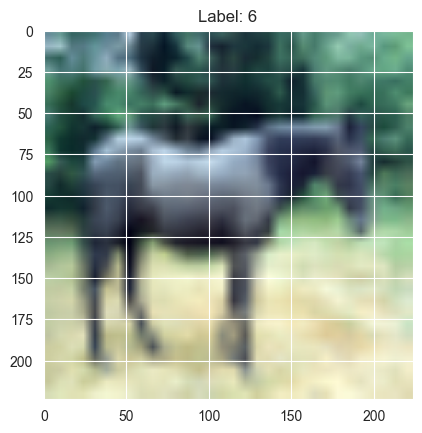

In [64]:
images, labels = next(iter(train_dataloader))

image_np = images[10].numpy()
image_np = image_np.transpose(1, 2, 0) 
image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())  # Normalize pixel values to [0, 1]
plt.imshow(image_np)
plt.title(f"Label: {labels[0].item()}")
plt.show()

# MobileNet

In [44]:
model = torchvision.models.mobilenet_v2(pretrained=True)

# Modify the last layer for your specific task
# Example: If you're doing binary classification, modify the last layer to output 2 classes
model.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(1280, 2)  # Modify output size according to your task
)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make predictions on new data
# Assuming test_data is your test dataset
# Replace test_data with your actual test dataset
# Assuming you're using GPU for faster computation (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()  # Set the model to evaluation mode
predictions = []
with torch.no_grad():
    for images, _ in valid_dataloader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())

C:\Users\wojew\Documents\DS\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\wojew\Documents\DS\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\wojew/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:02<00:00, 5.61MB/s]


IndexError: Target 3 is out of bounds.

In [46]:
# Assuming your DataLoader is named 'dataloader'
labels_list = []

for _, labels in valid_dataloader:
    labels_list.extend(labels.tolist())
labels_list
# Now labels_list contains all the labels from the DataLoader


[1,
 4,
 7,
 9,
 0,
 8,
 0,
 5,
 1,
 8,
 6,
 9,
 9,
 6,
 4,
 1,
 4,
 9,
 9,
 6,
 4,
 7,
 0,
 4,
 9,
 2,
 6,
 8,
 5,
 7,
 9,
 3,
 5,
 8,
 5,
 8,
 2,
 7,
 1,
 7,
 8,
 5,
 8,
 1,
 6,
 8,
 9,
 4,
 1,
 8,
 9,
 5,
 6,
 7,
 2,
 8,
 6,
 7,
 8,
 0,
 9,
 8,
 3,
 5,
 2,
 0,
 5,
 5,
 7,
 6,
 2,
 0,
 7,
 6,
 7,
 3,
 3,
 9,
 4,
 9,
 9,
 9,
 3,
 6,
 4,
 7,
 2,
 6,
 0,
 3,
 8,
 9,
 8,
 2,
 7,
 1,
 4,
 6,
 8,
 2,
 8,
 8,
 3,
 1,
 4,
 6,
 0,
 6,
 0,
 9,
 8,
 8,
 6,
 3,
 6,
 8,
 0,
 8,
 7,
 5,
 4,
 5,
 7,
 4,
 3,
 1,
 6,
 1,
 8,
 7,
 2,
 7,
 6,
 1,
 0,
 1,
 4,
 1,
 0,
 9,
 7,
 1,
 1,
 2,
 8,
 3,
 7,
 1,
 1,
 8,
 4,
 3,
 4,
 7,
 6,
 6,
 0,
 4,
 4,
 4,
 2,
 0,
 4,
 6,
 1,
 3,
 0,
 0,
 1,
 6,
 2,
 8,
 4,
 8,
 0,
 3,
 3,
 8,
 4,
 0,
 9,
 9,
 9,
 2,
 7,
 8,
 8,
 9,
 1,
 8,
 8,
 5,
 7,
 3,
 4,
 8,
 1,
 9,
 7,
 3,
 0,
 5,
 8,
 7,
 3,
 1,
 3,
 3,
 0,
 3,
 1,
 5,
 4,
 2,
 0,
 0,
 4,
 4,
 4,
 3,
 9,
 5,
 1,
 7,
 4,
 3,
 2,
 2,
 9,
 3,
 1,
 0,
 4,
 7,
 5,
 6,
 1,
 1,
 5,
 4,
 6,
 3,
 2,
 1,
 3,
 3,
 5,
 8,
 0,
 1,


# 

In [54]:
cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]

# Inne

In [71]:
device = torch.device('cpu')

In [72]:
model = geffnet.create_model('efficientnet_b2', pretrained=True)

# Freezing all the layers
for param in model.parameters():
  param.requires_grad = False

# Changing the Classifier
model.classifier = nn.Sequential(nn.Linear(1408,512),
                           nn.ReLU(),
                           nn.Dropout(p=0.4),
                           nn.Linear(512,128),
                           nn.ReLU(),
                           nn.Dropout(p=0.4),
                           nn.Linear(128,len(classes)))

# Making the Classifier layer Trainable                           
for param in model.classifier.parameters():
  param.requires_grad = True

# Moving the model to device
model.to(device)

GenEfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
      (1): Depthwise

In [73]:
criterion = nn.CrossEntropyLoss()
optimizer  = optim.Adam(model.classifier.parameters(), lr = 0.1)
scheduler = StepLR(optimizer, step_size=6, gamma=0.35)

In [ ]:
epochs = 10 # Number of epochs
steps = 0 
print_every = 5 
train_losses, valid_losses,valid_acc = [], [], [] # List keeping track of losses and accuracy to plot later
valid_loss_min = np.Inf # It will be used to save model whenever Vallidation loss decreases
valid_acc_min = 0.0 

for e in range(epochs):
  
  train_loss = 0 
  model.train()
  print('epoch', e)
  #train the model
  for images, labels in train_dataloader:
    steps+=1
    # Move tensor to device('cuda' in case of GPU or 'cpu' in case of CPU)
    # images, labels = images.to(device), labels.to(device)
    # Clearing all the previous gradients
    optimizer.zero_grad()
    # Forward Pass
    logits = model(images)
    # Loss calculation
    loss = criterion(logits,labels)
    # Backward Pass
    loss.backward()
    # Update the parameters
    optimizer.step()
    # Updating the losses list
    train_loss += loss.item()
    
    # Evaluating after specific amount of steps
    if steps % print_every == 0:
      valid_loss = 0
      accuracy = 0
      # Setting Model to Evaluation Mode
      model.eval()
      with torch.no_grad():
        # Getting Validation loss
        for images, labels in valid_dataloader:
          # images, labels = images.to(device), labels.to(device)
          logits = model(images)
          batch_loss = criterion(logits,labels)
          valid_loss += batch_loss.item()
          
          # Calculating Accuracy
          output = F.softmax(logits,dim=1)
          top_p,top_class = output.topk(1,dim = 1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
      # Printing stats    
      print(f"Epoch {e+1}/{epochs}.. "
                  f"Train loss: {train_loss/print_every:.3f}.. "
                  f"Validation loss: {valid_loss/len(valid_dataloader):.3f}.. "
                  f"Validation accuracy: {accuracy/len(valid_dataloader):.3f}.. "
                  f"LR : {scheduler.get_lr():}"
                  )
      valid_loss = valid_loss/len(valid_dataloader)
      train_losses.append(train_loss/print_every)
      valid_losses.append(valid_loss)
      valid_acc.append(accuracy/len(valid_dataloader))
      
      # Checking if Validation loss decreased
      if valid_loss <= valid_loss_min:
        
        # if decreased, it will save the model
        print('valid loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss
      
      
  # Scheduler performing a step to change learning rate of Optimizer    
  scheduler.step()

epoch 0


Squeezenet